In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df= pd.read_csv('/content/drive/My Drive/Football Hackton/train.csv')
#test = pd.read_csv('/content/drive/My Drive/Football Hackton/test.csv')


In [ ]:
df.head()

,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,1,13,7.0,winner,team1,8,7.0,7.0,0.317073,0.48,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,3,16,6.5,loser,team2,8,3.0,9.0,0.463415,0.42,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,4,4,8.5,loser,team1,5,11.0,11.0,0.682927,0.44,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,5,13,8.0,loser,team2,4,17.0,17.0,0.682927,0.58,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,7,11,3.5,draw,team1,5,10.0,10.0,0.731707,0.70,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20453 entries, 0 to 20452
Columns: 800 entries, row_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(4), object(2)
memory usage: 124.8+ MB


In [ ]:
df.shape

(20453, 800)

Distribution of the target coulmn (rating_num)

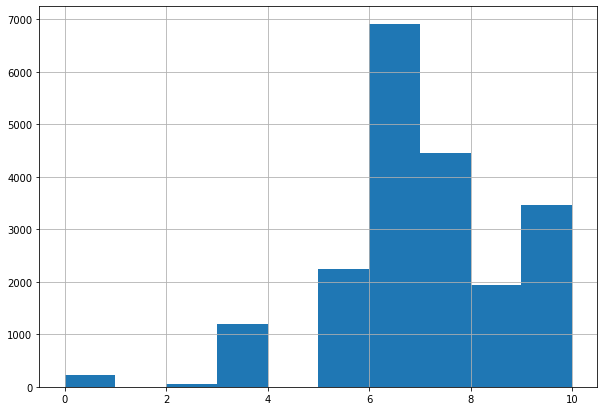

In [ ]:
plt.figure(figsize=(10,7))
df['rating_num'].hist(bins=10)

Visualizing the outliers using boxplot

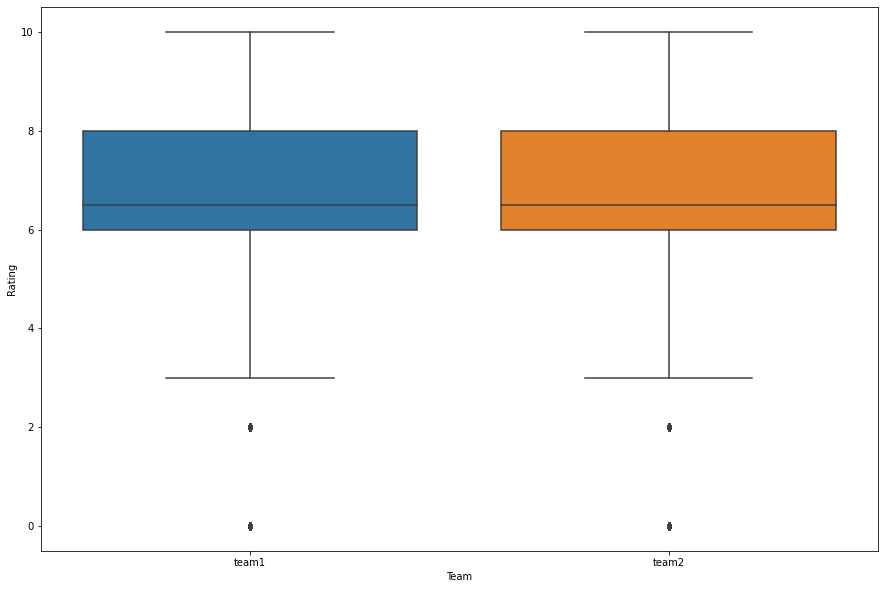

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.boxplot(x = 'team', y = 'rating_num', data = df)
plt.xlabel('Team')
plt.ylabel('Rating')
plt.show()

In [ ]:
low_rating = df[df['rating_num']<3]
low_rating['rating_num'].count()

267

In [ ]:
df= df.loc[(df['rating_num']>=3)]
df.reset_index(drop=True, inplace=True)
df.shape

(20186, 800)

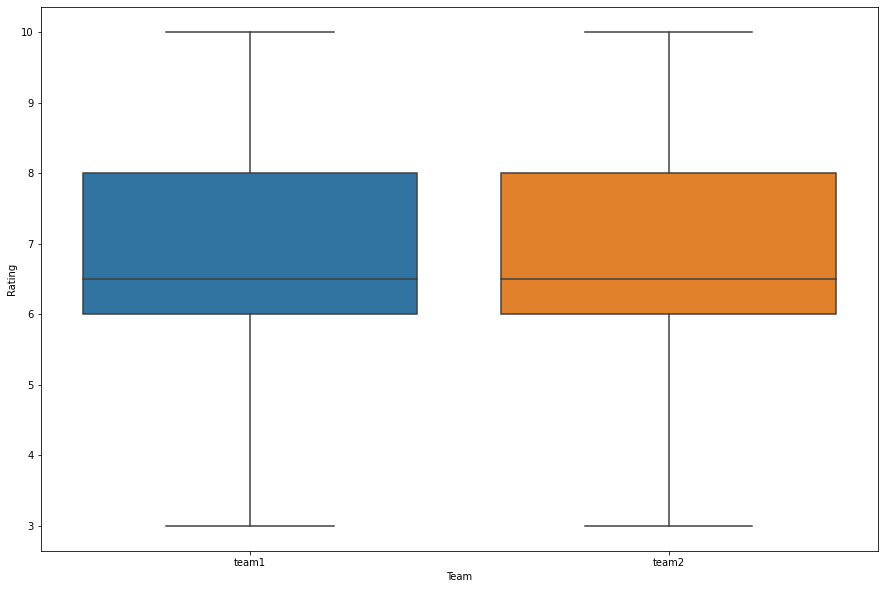

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'team', y = 'rating_num', data = df)
plt.xlabel('Team')
plt.ylabel('Rating')
plt.show()

In [ ]:
df['rating_num'].isna().sum()
df['team'].value_counts()

team1    10161
team2    10025
Name: team, dtype: int64

Visualizing relationship between 2 features "player_position_1" and "player_position_2"

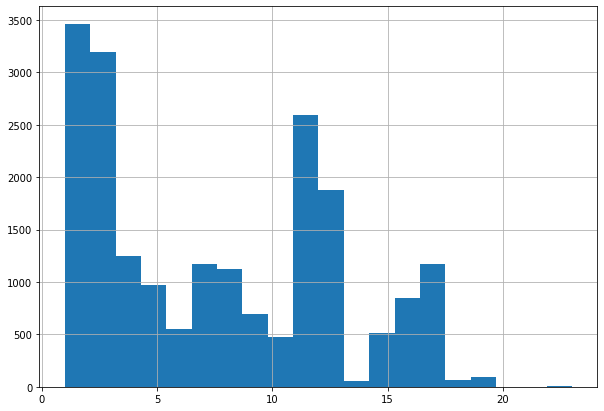

In [ ]:
plt.figure(figsize=(10,7))
df['player_position_1'].hist(bins=20)
#df['player_position_2'].hist(bins=10)

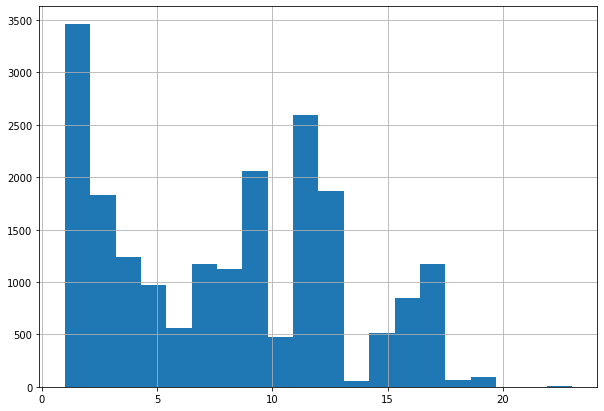

In [ ]:
plt.figure(figsize=(10,7))
#df['player_position_1'].hist(bins=20)
df['player_position_2'].hist(bins=20)

In [ ]:
df['winner'].value_counts()

winner    8665
loser     6288
draw      5233
Name: winner, dtype: int64

In [ ]:
df['team'].value_counts()

team1    10161
team2    10025
Name: team, dtype: int64

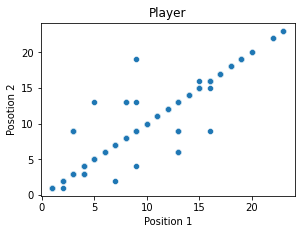

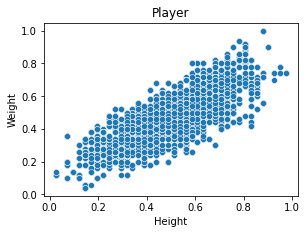

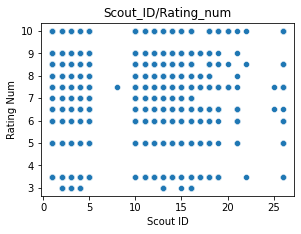

In [ ]:
plt.figure(figsize = (10,7))

plt.subplot(2,2,1)
sns.scatterplot(data = df, x='player_position_1', y='player_position_2')
plt.title('Player')
plt.xlabel('Position 1')
plt.ylabel('Posotion 2')
plt.show()

plt.figure(figsize = (10,7))
plt.subplot(2,2,2)
sns.scatterplot(data = df, x='player_height', y='player_weight')
plt.title('Player')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

plt.figure(figsize = (10,7))
plt.subplot(2,2,3)
sns.scatterplot(data = df, x='scout_id', y='rating_num')
plt.title('Scout_ID/Rating_num')
plt.xlabel('Scout ID')
plt.ylabel('Rating Num')
plt.show()

Creating a table for features with number datatypes

In [ ]:
dfA= df.select_dtypes(include=[np.number])

In [ ]:
dfA

,row_id,scout_id,rating_num,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,1,13,7.0,8,7.0,7.0,0.317073,0.48,0.0,0,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,3,16,6.5,8,3.0,9.0,0.463415,0.42,0.0,0,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,4,4,8.5,5,11.0,11.0,0.682927,0.44,0.0,0,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,5,13,8.0,4,17.0,17.0,0.682927,0.58,0.0,0,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,7,11,3.5,5,10.0,10.0,0.731707,0.70,0.0,0,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,29221,14,5.0,14,NaN,NaN,0.439024,0.26,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20182,29223,3,6.0,11,4.0,4.0,0.390244,0.32,0.0,0,...,0.362193,0.240326,0.369752,0.438649,0.381099,0.264074,0.171927,0.422975,0.588501,0.534694
20183,29224,4,5.0,7,5.0,5.0,0.268293,0.30,0.0,0,...,0.341322,0.248870,0.240096,0.515025,0.694587,0.869000,0.296820,0.511550,0.548315,0.385927
20184,29226,13,6.0,8,5.0,5.0,0.463415,0.46,0.0,0,...,0.215831,0.190395,0.207007,0.631279,0.330606,0.322158,0.108018,0.333229,0.349177,0.458685


Creating tables having 100 features each of the features with number datatypes, we can easily visualize the distribution of individual features, identify constants and features with zero data, then drop them

In [ ]:
df1=dfA.iloc[:, :100]

In [ ]:
df2=dfA.iloc[:,101:201]
df3=dfA.iloc[:,201:301]
df4=dfA.iloc[:,301:401]
df5=dfA.iloc[:,401:501]
df6=dfA.iloc[:,501:601]
df7=dfA.iloc[:,601:701]
df8=dfA.iloc[:,701:]

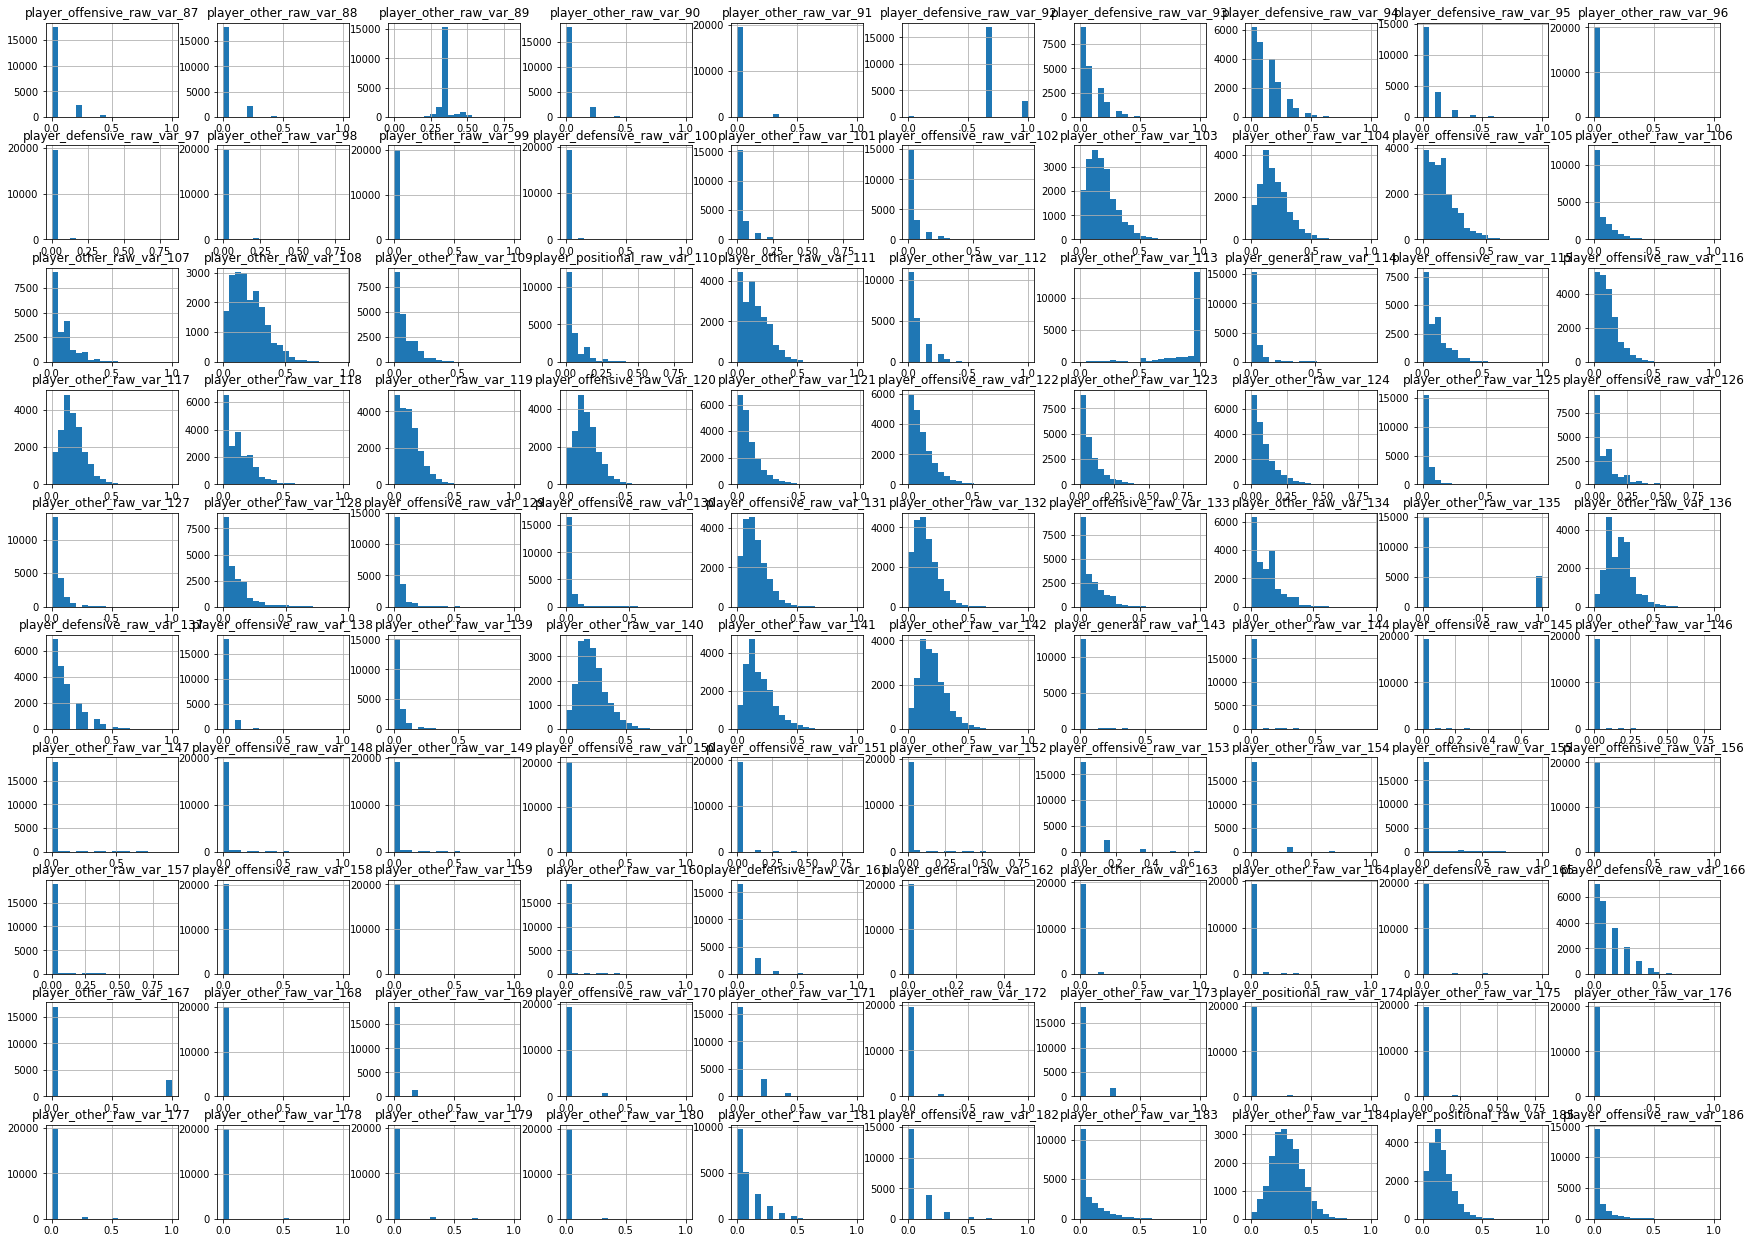

In [ ]:
df2.hist(bins=20, figsize=(30, 22))
plt.show()

In [ ]:
#df5A = df5A.iloc[:,[0,4,5,8,11,12,14,15,16,18,20,26,27,30,31,32]]
df8A.isna().sum()

team2_other_raw_var_70            1391
team2_defensive_raw_var_71        1391
team2_other_raw_var_73            1391
team2_other_raw_var_74            1391
team2_other_raw_var_75            1391
                                  ... 
team2_defensive_derived_var_15    1391
team2_offensive_derived_var_16    1391
team2_defensive_derived_var_17    1391
team2_offensive_derived_var_18    1391
team2_offensive_derived_var_19    1391
Length: 63, dtype: int64

Concatenating the tables into one table

In [ ]:
data = pd.concat([df1A, df2A, df3A, df4A, df5A, df6A, df7A, df8A], axis=1)

In [ ]:
data

,scout_id,rating_num,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_4,player_defensive_raw_var_4,player_other_raw_var_6,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,13,7.0,8,7.0,7.0,0.317073,0.48,0.114754,0.0000,0.467550,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,16,6.5,8,3.0,9.0,0.463415,0.42,0.081967,0.0625,0.436467,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,4,8.5,5,11.0,11.0,0.682927,0.44,0.065574,0.1875,0.631370,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,13,8.0,4,17.0,17.0,0.682927,0.58,0.000000,0.0000,0.467550,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,11,3.5,5,10.0,10.0,0.731707,0.70,0.262295,0.0000,0.467550,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,14,5.0,14,NaN,NaN,0.439024,0.26,0.049180,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20182,3,6.0,11,4.0,4.0,0.390244,0.32,0.122951,0.0000,0.437765,...,0.362193,0.240326,0.369752,0.438649,0.381099,0.264074,0.171927,0.422975,0.588501,0.534694
20183,4,5.0,7,5.0,5.0,0.268293,0.30,0.155738,0.0000,0.521246,...,0.341322,0.248870,0.240096,0.515025,0.694587,0.869000,0.296820,0.511550,0.548315,0.385927
20184,13,6.0,8,5.0,5.0,0.463415,0.46,0.229508,0.0000,0.467550,...,0.215831,0.190395,0.207007,0.631279,0.330606,0.322158,0.108018,0.333229,0.349177,0.458685


Creating a table for features identified as categorical features

In [ ]:
data_cat = data[['scout_id','competitionId','player_position_1','player_position_2']]

In [ ]:
data = data.drop(['scout_id','competitionId','player_position_1','player_position_2', 'team2_system_id'], axis=1)

In [ ]:
data.isna().sum()

rating_num                           0
player_height                        2
player_weight                        2
player_general_var_4                 0
player_defensive_raw_var_4         371
                                  ... 
team2_defensive_derived_var_15    1391
team2_offensive_derived_var_16    1391
team2_defensive_derived_var_17    1391
team2_offensive_derived_var_18    1391
team2_offensive_derived_var_19    1391
Length: 388, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20186 entries, 0 to 20185
Columns: 388 entries, rating_num to team2_offensive_derived_var_19
dtypes: float64(388)
memory usage: 59.8 MB


Fill missing values with median

In [ ]:
median = data.median()
median

rating_num                        6.500000
player_height                     0.512195
player_weight                     0.440000
player_general_var_4              0.114754
player_defensive_raw_var_4        0.000000
                                    ...   
team2_defensive_derived_var_15    0.499538
team2_offensive_derived_var_16    0.102899
team2_defensive_derived_var_17    0.422325
team2_offensive_derived_var_18    0.420201
team2_offensive_derived_var_19    0.320256
Length: 388, dtype: float64

In [ ]:
data.fillna(median, inplace=True)

In [ ]:
df_cat = df[['winner', 'team']]

In [ ]:
data_cat = pd.concat([data_cat, df_cat], axis=1)

In [ ]:
data.shape

(20186, 388)

In [ ]:
data_cat

,scout_id,competitionId,player_position_1,player_position_2,winner,team
0,13,8,7.0,7.0,winner,team1
1,16,8,3.0,9.0,loser,team2
2,4,5,11.0,11.0,loser,team1
3,13,4,17.0,17.0,loser,team2
4,11,5,10.0,10.0,draw,team1
...,...,...,...,...,...,...
20181,14,14,NaN,NaN,draw,team2
20182,3,11,4.0,4.0,winner,team2
20183,4,7,5.0,5.0,loser,team1
20184,13,8,5.0,5.0,loser,team1


In [ ]:
#data_cat = data_cat.drop(['team2_system_id'], axis=1)

Fill missing values with mode for categorical features

In [ ]:
mode = data_cat.mode()

In [ ]:
data_cat.fillna(mode, inplace=True)

In [ ]:
data_cat=data_cat.astype(str)

In [ ]:
data_cat.isna().sum()

scout_id             0
competitionId        0
player_position_1    0
player_position_2    0
winner               0
team                 0
dtype: int64

Player_position_1 and player_position_2 are the same so I dropped one

In [ ]:
data_cat = data_cat.drop(['player_position_2'], axis=1)

In [ ]:
data= data.drop(['team2_other_ratio_var_32'], axis=1)

In [ ]:
data.head()

,rating_num,player_height,player_weight,player_general_var_4,player_defensive_raw_var_4,player_other_raw_var_6,player_offensive_raw_var_31,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_38,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,7.0,0.317073,0.48,0.114754,0.0000,0.467550,0.142857,0.090909,0.0,0.294118,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,6.5,0.463415,0.42,0.081967,0.0625,0.436467,0.000000,0.090909,0.1,0.000000,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,8.5,0.682927,0.44,0.065574,0.1875,0.631370,0.071429,0.090909,0.0,0.117647,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,8.0,0.682927,0.58,0.000000,0.0000,0.467550,0.000000,0.000000,0.0,0.000000,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,3.5,0.731707,0.70,0.262295,0.0000,0.467550,0.000000,0.090909,0.1,0.000000,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500


Combined the tables with number datatypes and categorical datatypes

In [ ]:
data_comb = pd.concat([data, data_cat], axis=1)

In [ ]:
#data_comb

Split the table into train and test using the stratified split

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(data_comb, data_comb["rating_num"]):
    strat_train_set = data_comb.loc[train_index]
    strat_test_set = data_comb.loc[test_index]

In [ ]:
y_test = strat_test_set['rating_num']
X_test = strat_test_set.drop(['rating_num'], axis=1)

In [ ]:
y_train = strat_train_set['rating_num']
X_train = strat_train_set.drop(['rating_num'], axis=1)

In [ ]:
#y_train

Apply the CatBoostRegressor algorithm and visualize the feature importance without encoding the categorical variables

In [ ]:
#!pip install catboost
from catboost import CatBoostRegressor, Pool
categorical_features =  np.where(X_train.dtypes == object )[0]

model = CatBoostRegressor(iterations=5000)
model.fit(X_train, y_train, cat_features=categorical_features)
cat_pred = model.predict(X_test)

Text(0.5, 1.0, 'Feature Importance')

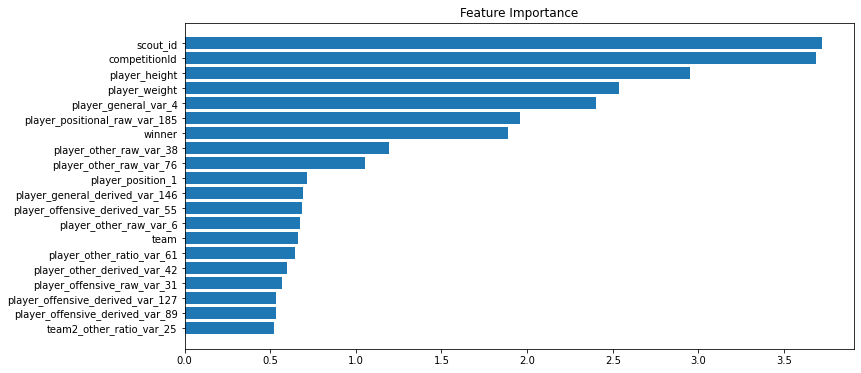

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[-20:]

fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [ ]:
from sklearn.metrics import r2_score
r2= r2_score(y_test, cat_pred)
print(r2)

0.3392023505354195


Using the top features

In [ ]:
X_train_2 = X_train[['competitionId','scout_id','player_height','player_weight','player_general_var_4','player_positional_raw_var_185','winner','player_other_raw_var_38','player_other_raw_var_76','player_position_1',
                   'player_general_derived_var_146','player_offensive_derived_var_55','player_other_raw_var_6','team','player_other_ratio_var_61','player_other_derived_var_42','player_offensive_raw_var_31','player_offensive_derived_var_127',
                   'player_offensive_derived_var_89','team2_other_ratio_var_25']]
X_test_2 = X_test[['competitionId','scout_id','player_height','player_weight','player_general_var_4','player_positional_raw_var_185','winner','player_other_raw_var_38','player_other_raw_var_76','player_position_1',
                    'player_general_derived_var_146','player_offensive_derived_var_55','player_other_raw_var_6','team','player_other_ratio_var_61','player_other_derived_var_42','player_offensive_raw_var_31','player_offensive_derived_var_127',
                    'player_offensive_derived_var_89','team2_other_ratio_var_25']]

In [ ]:
#from catboost import CatBoostRegressor, Pool
categorical_features =  np.where(X_train_2.dtypes == object )[0]

model = CatBoostRegressor(iterations=5000)
model.fit(X_train_2, y_train, cat_features=categorical_features)
test_pred = model.predict(X_test_2)


r2= r2_score(y_test, test_pred)
print(r2)

In [ ]:
r2= r2_score(y_test, test_pred)
print(r2)

0.31199377166013276


Encoding the categorical variables

In [ ]:
data_cat

,scout_id,competitionId,player_position_1,winner,team
0,13,8,7.0,winner,team1
1,16,8,3.0,loser,team2
2,4,5,11.0,loser,team1
3,13,4,17.0,loser,team2
4,11,5,10.0,draw,team1
...,...,...,...,...,...
20181,14,14,nan,draw,team2
20182,3,11,4.0,winner,team2
20183,4,7,5.0,loser,team1
20184,13,8,5.0,loser,team1


In [ ]:
cat = pd.get_dummies(data_cat)

In [ ]:
cat

,scout_id_1,scout_id_10,scout_id_11,scout_id_12,scout_id_13,scout_id_14,scout_id_15,scout_id_16,scout_id_17,scout_id_18,...,player_position_1_6.0,player_position_1_7.0,player_position_1_8.0,player_position_1_9.0,player_position_1_nan,winner_draw,winner_loser,winner_winner,team_team1,team_team2
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
20182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
20183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
20184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
data2 = pd.concat([data,cat], axis=1)

In [ ]:
data2

,rating_num,player_height,player_weight,player_general_var_4,player_defensive_raw_var_4,player_other_raw_var_6,player_offensive_raw_var_31,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_38,...,player_position_1_6.0,player_position_1_7.0,player_position_1_8.0,player_position_1_9.0,player_position_1_nan,winner_draw,winner_loser,winner_winner,team_team1,team_team2
0,7.0,0.317073,0.48,0.114754,0.0000,0.467550,0.142857,0.090909,0.0,0.294118,...,0,1,0,0,0,0,0,1,1,0
1,6.5,0.463415,0.42,0.081967,0.0625,0.436467,0.000000,0.090909,0.1,0.000000,...,0,0,0,0,0,0,1,0,0,1
2,8.5,0.682927,0.44,0.065574,0.1875,0.631370,0.071429,0.090909,0.0,0.117647,...,0,0,0,0,0,0,1,0,1,0
3,8.0,0.682927,0.58,0.000000,0.0000,0.467550,0.000000,0.000000,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,1
4,3.5,0.731707,0.70,0.262295,0.0000,0.467550,0.000000,0.090909,0.1,0.000000,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,5.0,0.439024,0.26,0.049180,0.0000,0.467550,0.071429,0.090909,0.0,0.058824,...,0,0,0,0,1,1,0,0,0,1
20182,6.0,0.390244,0.32,0.122951,0.0000,0.437765,0.000000,0.181818,0.1,0.000000,...,0,0,0,0,0,0,0,1,0,1
20183,5.0,0.268293,0.30,0.155738,0.0000,0.521246,0.071429,0.000000,0.0,0.058824,...,0,0,0,0,0,0,1,0,1,0
20184,6.0,0.463415,0.46,0.229508,0.0000,0.467550,0.071429,0.090909,0.1,0.176471,...,0,0,0,0,0,0,1,0,1,0


Spliting the new table comprising the encoded features

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=45)
for train_index, test_index in split.split(data2, data2["rating_num"]):
    strat_train_set = data2.loc[train_index]
    strat_test_set = data2.loc[test_index]

y_test = strat_test_set['rating_num']
X_test = strat_test_set.drop(['rating_num'], axis=1)

y_train = strat_train_set['rating_num']
X_train = strat_train_set.drop(['rating_num'], axis=1)

Applying sklearn StandardScaler algorithm to scale the features into having a mean of 0 and variance of 1

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_train_scaled

x_test_scaled = scaler.fit_transform(X_test)
x_test_scaled

array([[-0.34951471, -1.24554487,  0.4518889 , ...,  1.12801607,
         0.97649802, -0.97649802],
       [ 1.01090446,  1.1660425 , -1.0757863 , ..., -0.88651219,
        -1.02406761,  1.02406761],
       [-1.10530313, -0.53625446, -0.24829557, ...,  1.12801607,
        -1.02406761,  1.02406761],
       ...,
       [ 1.6155352 ,  1.44975866,  1.08842023, ..., -0.88651219,
        -1.02406761,  1.02406761],
       [ 1.31321983,  0.74046826, -0.8848269 , ...,  1.12801607,
        -1.02406761,  1.02406761],
       [ 0.70858909,  0.31489402,  0.0699701 , ...,  1.12801607,
        -1.02406761,  1.02406761]])

In [ ]:
def lgbm_reg(x_train_scaled,y_train,x_test_scaled,n=10,cv=10,
                learning_rate=[0.01,0.05,0.1,0.3,0.5],
                max_depth= [2,4,6,8,10,12],
                num_leaves= [25,50,100,200],
                reg_lambda=[0.8],
                reg_alpha=[0.8],
                n_estimators=[50,100,200,500,1000],
                subsample_freq=[1,2,3,4]):

    from sklearn.model_selection import RandomizedSearchCV

    import warnings

    import lightgbm as lgbm

    warnings.filterwarnings('ignore')

    from sklearn.pipeline import Pipeline,FeatureUnion
    from sklearn.base import BaseEstimator, TransformerMixin

    def report(results, n_top=3):
        for i in range(1, n_top + 1):
            candidates = np.flatnonzero(results['rank_test_score'] == i)
            for candidate in candidates:
                print("Model with rank: {0}".format(i))
                print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                      results['mean_test_score'][candidate],
                      results['std_test_score'][candidate]))
                print("Parameters: {0}".format(results['params'][candidate]))
                print("")


    lgbm_params = {
                "learning_rate":learning_rate,
                "max_depth":max_depth,
                "num_leaves":num_leaves,
                "n_estimators":n_estimators,
                "reg_lambda":reg_lambda,
                "reg_alpha":reg_alpha,
                "subsample_freq":subsample_freq,
                #"metric":'rmse'
             }


    lgbm=lgbm.LGBMRegressor()
    n_iter=n

    random_search=RandomizedSearchCV(lgbm,n_jobs=-1,cv=cv,n_iter=n,scoring='r2',
                                 param_distributions=lgbm_params)
    random_search.fit(x_train_scaled,y_train)
    report(random_search.cv_results_,5)
    test_pred= random_search.predict(x_test_scaled)
    test_pred=test_pred.reshape(len(test_pred),1)
    return(test_pred)

In [ ]:
import time
start_time = time.time()
lgbm_pred = lgbm_reg(x_train_scaled,y_train,
                    x_test_scaled,cv=3,n=1,
                   n_estimators=[1000],learning_rate=[0.05],
                   subsample_freq=[2],num_leaves=[100],
                     max_depth=[8],
                    )

Model with rank: 1
Mean validation score: 0.320 (std: 0.00498)
Parameters: {'subsample_freq': 2, 'reg_lambda': 0.8, 'reg_alpha': 0.8, 'num_leaves': 100, 'n_estimators': 1000, 'max_depth': 8, 'learning_rate': 0.05}



In [ ]:
r2= r2_score(y_test, lgbm_pred)
print(r2)

0.37624979654447566


Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gboost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                   max_depth=8, max_features='sqrt',
                                   min_samples_leaf=100, min_samples_split=10,
                                   loss='huber', random_state =5)
gboost.fit(x_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=8,
                          max_features='sqrt', min_samples_leaf=100,
                          min_samples_split=10, n_estimators=1000,
                          random_state=5)

In [ ]:
gboost_pred = gboost.predict(x_test_scaled)
r2= r2_score(y_test, gboost_pred)
print(r2)

0.33501464617428733


In [ ]:
print('Test data: {0},{1},{2}'.format(min(y_test),max(y_test),y_test.mean()))
print('GBoost prediction: {0},{1},{2}'.format(min(gboost_pred),max(gboost_pred),gboost_pred.mean()))
print('CatBoost prediction: {0},{1},{2}'.format(min(cat_pred),max(cat_pred),cat_pred.mean()))

Test data: 3.0,10.0,6.974075297225892
GBoost prediction: 3.72583418480336,10.29169502100599,6.948845053161713
CatBoost prediction: 3.404654153133884,9.980871288398443,6.977685285363421
